In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras. models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3, Xception

Using TensorFlow backend.


In [2]:
init_learning_rate = 1e-3
total_epochs = 10
batch = 16

base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))
#base_model.summary()

head = base_model.output
head = AveragePooling2D(pool_size = (4, 4))(head)
head = Flatten(name = "flatten")(head)
head = Dense(64, activation = "relu")(head)
head = Dropout(0.5)(head)
head = Dense(2, activation = "softmax")(head)

model = Model(inputs = base_model.input, outputs = head)

for layer in base_model.layers:
    layer.trainable = False
    

83689472/83683744 [==============================] - 1s 0us/step


In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

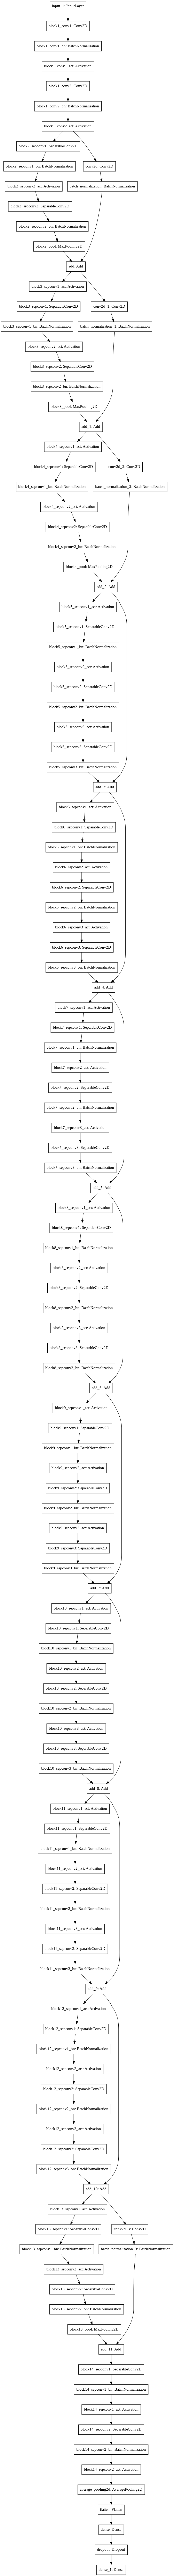

In [4]:
tf.keras.utils.plot_model(model, 'Wazir_first_model.png')